# Relax Challenge

For this challenge, we're asked to determine which factors could predict which users are considered to be adopted users. Adopted users are those that login at least 3 times within any seven day period.  We'll start by loading both datasets and doing some cleaning before we combine them into a single dataset that's ready for analysis.

In [2]:
# Import the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
# Read in the first dataset and include encoding to convert to UTF-8 
users = pd.read_csv('takehome_users.csv', encoding = "ISO-8859-1")
users.head(20)

,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id
0,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,1.398139e+09,1,0,11,10803.0
1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0
2,3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,1.363735e+09,0,0,94,1525.0
3,4,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,1.369210e+09,0,0,1,5151.0
4,5,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,1.358850e+09,0,0,193,5240.0
5,6,2013-12-17 03:37:06,Cunha Eduardo,EduardoPereiraCunha@yahoo.com,GUEST_INVITE,1.387424e+09,0,0,197,11241.0
6,7,2012-12-16 13:24:32,Sewell Tyler,TylerSewell@jourrapide.com,SIGNUP,1.356010e+09,0,1,37,NaN
7,8,2013-07-31 05:34:02,Hamilton Danielle,DanielleHamilton@yahoo.com,PERSONAL_PROJECTS,NaN,1,1,74,NaN
8,9,2013-11-05 04:04:24,Amsel Paul,PaulAmsel@hotmail.com,PERSONAL_PROJECTS,NaN,0,0,302,NaN
9,10,2013-01-16 22:08:03,Santos Carla,CarlaFerreiraSantos@gustr.com,ORG_INVITE,1.401833e+09,1,1,318,4143.0


In [4]:
users.describe()

,object_id,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id
count,12000.00000,8.823000e+03,12000.000000,12000.000000,12000.000000,6417.000000
mean,6000.50000,1.379279e+09,0.249500,0.149333,141.884583,5962.957145
std,3464.24595,1.953116e+07,0.432742,0.356432,124.056723,3383.761968
min,1.00000,1.338452e+09,0.000000,0.000000,0.000000,3.000000
25%,3000.75000,1.363195e+09,0.000000,0.000000,29.000000,3058.000000
50%,6000.50000,1.382888e+09,0.000000,0.000000,108.000000,5954.000000
75%,9000.25000,1.398443e+09,0.000000,0.000000,238.250000,8817.000000
max,12000.00000,1.402067e+09,1.000000,1.000000,416.000000,11999.000000


In [5]:
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12000 entries, 0 to 11999
Data columns (total 10 columns):
object_id                     12000 non-null int64
creation_time                 12000 non-null object
name                          12000 non-null object
email                         12000 non-null object
creation_source               12000 non-null object
last_session_creation_time    8823 non-null float64
opted_in_to_mailing_list      12000 non-null int64
enabled_for_marketing_drip    12000 non-null int64
org_id                        12000 non-null int64
invited_by_user_id            6417 non-null float64
dtypes: float64(2), int64(4), object(4)
memory usage: 937.6+ KB


In [6]:
# Read in the second dataset
user_eng = pd.read_csv("takehome_user_engagement.csv")
user_eng.head(20)

,time_stamp,user_id,visited
0,2014-04-22 03:53:30,1,1
1,2013-11-15 03:45:04,2,1
2,2013-11-29 03:45:04,2,1
3,2013-12-09 03:45:04,2,1
4,2013-12-25 03:45:04,2,1
5,2013-12-31 03:45:04,2,1
6,2014-01-08 03:45:04,2,1
7,2014-02-03 03:45:04,2,1
8,2014-02-08 03:45:04,2,1
9,2014-02-09 03:45:04,2,1


In [7]:
user_eng.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 207917 entries, 0 to 207916
Data columns (total 3 columns):
time_stamp    207917 non-null object
user_id       207917 non-null int64
visited       207917 non-null int64
dtypes: int64(2), object(1)
memory usage: 4.8+ MB


In [8]:
users = users.rename({'object_id': 'user_id'}, axis='columns')

In [9]:
# replace all nan values with 0 (fillna)
users = users.fillna(0)
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12000 entries, 0 to 11999
Data columns (total 10 columns):
user_id                       12000 non-null int64
creation_time                 12000 non-null object
name                          12000 non-null object
email                         12000 non-null object
creation_source               12000 non-null object
last_session_creation_time    12000 non-null float64
opted_in_to_mailing_list      12000 non-null int64
enabled_for_marketing_drip    12000 non-null int64
org_id                        12000 non-null int64
invited_by_user_id            12000 non-null float64
dtypes: float64(2), int64(4), object(4)
memory usage: 937.6+ KB


In [10]:
# Replace unix time values with datetime using lambda 
import datetime
users['last_session_creation_time'] = users['last_session_creation_time'].map(lambda x: datetime.datetime.fromtimestamp(int(x)).strftime('%Y-%m-%d %H:%M:%S'))

In [11]:
users.head()

,user_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id
0,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,2014-04-21 20:53:30,1,0,11,10803.0
1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,2014-03-30 20:45:04,0,0,1,316.0
2,3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,2013-03-19 16:14:52,0,0,94,1525.0
3,4,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,2013-05-22 01:09:28,0,0,1,5151.0
4,5,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,2013-01-22 02:14:20,0,0,193,5240.0


We'll drop the names since they won't be useful without further infromation about the users. However, we'll keep the email addresses because the email company may possibly have some predictive power.

In [12]:
# Drop names
users = users.drop(['name'], axis=1)

In [14]:
# Keep only the email company names from the email addresses
users['email'] = users['email'].map(lambda x: x.split('@', 1)[-1])

In [15]:
users.head(5)

,user_id,creation_time,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id
0,1,2014-04-22 03:53:30,yahoo.com,GUEST_INVITE,2014-04-21 20:53:30,1,0,11,10803.0
1,2,2013-11-15 03:45:04,gustr.com,ORG_INVITE,2014-03-30 20:45:04,0,0,1,316.0
2,3,2013-03-19 23:14:52,gustr.com,ORG_INVITE,2013-03-19 16:14:52,0,0,94,1525.0
3,4,2013-05-21 08:09:28,yahoo.com,GUEST_INVITE,2013-05-22 01:09:28,0,0,1,5151.0
4,5,2013-01-17 10:14:20,yahoo.com,GUEST_INVITE,2013-01-22 02:14:20,0,0,193,5240.0


In [16]:
# Find the number of unique email brands
users['email'].value_counts()

gmail.com         3562
yahoo.com         2447
jourrapide.com    1259
cuvox.de          1202
gustr.com         1179
hotmail.com       1165
dqwln.com            2
xvnbr.com            2
oqpze.com            2
qgjbc.com            2
rerwl.com            2
mumdc.com            2
xybhi.com            2
luque.com            2
qhnul.com            1
cyqff.com            1
ibhec.com            1
xgmsd.com            1
vxaiq.com            1
fkhiq.com            1
iitsl.com            1
ktsjn.com            1
uhzdq.com            1
ifeeg.com            1
cuvvr.com            1
hxufo.com            1
xqjvg.com            1
wwscd.com            1
iiqgf.com            1
wctlz.com            1
                  ... 
tpvjh.com            1
cbype.com            1
jbcii.com            1
xmqve.com            1
djmie.com            1
wcwee.com            1
aotcc.com            1
pybhg.com            1
mbuvw.com            1
dmbrh.com            1
xjdlv.com            1
mwxzf.com            1
rzxro.com  

Most of the users are concentrated among just six email brands. Since only 1186 email addresses are from brands not made up of the top six, we'll just categorize them as 'other'. These small email brands may not tell us anything about whether a user adopts, but their not being a part of the top six brands may tell us something.

In [17]:
# Create a function that replaces all minor email brands
email_brands = ['gmail.com', 'yahoo.com', 'hotmail.com', 'jourrapide.com', 'cuvox.de', 'gustr.com']

def email_replace():
    for i in users['email']:
        if i not in email_brands:
            users['email'] = users['email'].replace({i:'other'})    

In [18]:
# Call the email function
email_replace()

In [19]:
users['email'].value_counts()

gmail.com         3562
yahoo.com         2447
jourrapide.com    1259
cuvox.de          1202
other             1186
gustr.com         1179
hotmail.com       1165
Name: email, dtype: int64

We'll also look at a couple of other columns to see if they might be useful. Let's start with 'invited_by_user_id'.

In [148]:
# Unique values in invited column
users['invited_by_user_id'].value_counts()

0.0        5583
10741.0      13
2527.0       12
1525.0       11
2308.0       11
11770.0      11
4612.0       10
7012.0       10
10481.0      10
4803.0       10
6370.0       10
4302.0       10
8068.0       10
1175.0       10
2354.0       10
10628.0      10
2922.0        9
8426.0        9
6645.0        9
9023.0        9
6493.0        9
3721.0        9
9434.0        9
3789.0        9
6808.0        9
3944.0        9
7698.0        9
4551.0        9
7716.0        9
8554.0        9
           ... 
644.0         1
8152.0        1
294.0         1
1944.0        1
7879.0        1
7587.0        1
5938.0        1
8139.0        1
11857.0       1
5885.0        1
1875.0        1
8890.0        1
1784.0        1
1509.0        1
3928.0        1
2831.0        1
1158.0        1
7348.0        1
2578.0        1
4747.0        1
7658.0        1
3455.0        1
5454.0        1
1586.0        1
11293.0       1
7941.0        1
4134.0        1
6101.0        1
129.0         1
594.0         1
Name: invited_by_user_id

Earlier, we had over 5000 NaN values in this category that were replaced by 0.0. So, we don't know for sure that they weren't invited by other users, but for our purposes we'll assume that they weren't. As such, we see that the vast majority of users were not invited by other users. And of those who were, the numbers seem insignificant. Yet, the total who were invited by someone are significant, so it may be better to turn this into a categorical variable. 

In [20]:
# Any nonzero value in the invited by column is replaced by 1 to make the column categorical
def invited_categ():
    for i in users['invited_by_user_id']:
        if i != 0:
            users['invited_by_user_id'] = users['invited_by_user_id'].replace({i:1})

In [21]:
invited_categ()

In [22]:
users.head(20)

,user_id,creation_time,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id
0,1,2014-04-22 03:53:30,yahoo.com,GUEST_INVITE,2014-04-21 20:53:30,1,0,11,1.0
1,2,2013-11-15 03:45:04,gustr.com,ORG_INVITE,2014-03-30 20:45:04,0,0,1,1.0
2,3,2013-03-19 23:14:52,gustr.com,ORG_INVITE,2013-03-19 16:14:52,0,0,94,1.0
3,4,2013-05-21 08:09:28,yahoo.com,GUEST_INVITE,2013-05-22 01:09:28,0,0,1,1.0
4,5,2013-01-17 10:14:20,yahoo.com,GUEST_INVITE,2013-01-22 02:14:20,0,0,193,1.0
5,6,2013-12-17 03:37:06,yahoo.com,GUEST_INVITE,2013-12-18 19:37:06,0,0,197,1.0
6,7,2012-12-16 13:24:32,jourrapide.com,SIGNUP,2012-12-20 05:24:32,0,1,37,0.0
7,8,2013-07-31 05:34:02,yahoo.com,PERSONAL_PROJECTS,1969-12-31 16:00:00,1,1,74,0.0
8,9,2013-11-05 04:04:24,hotmail.com,PERSONAL_PROJECTS,1969-12-31 16:00:00,0,0,302,0.0
9,10,2013-01-16 22:08:03,gustr.com,ORG_INVITE,2014-06-03 15:08:03,1,1,318,1.0


Let's also take a look at 'org_id'. Since the values are numerical, any model that we use will give greater weight to larger values and could be problematic for our predictive abilities. 

In [23]:
users['org_id'].value_counts()

0      319
1      233
2      201
3      168
4      159
6      138
5      128
9      124
7      119
10     104
8       97
14      87
11      75
12      75
17      74
18      73
13      72
16      72
20      68
15      64
24      63
25      62
28      61
23      60
30      59
22      58
33      57
40      57
21      56
27      55
      ... 
399     13
410     13
322     12
387     12
346     12
407     12
295     12
354     12
344     12
405     12
381     12
356     12
301     12
232     12
364     11
183     11
365     11
352     10
353     10
294     10
378     10
304     10
395      9
315      9
355      9
396      9
400      8
397      8
386      7
416      2
Name: org_id, Length: 417, dtype: int64

A small group of organizations have more members than others. But those smaller organizations in total still have a
significant number of members. So, we can't simply categorize this column as we did with the email column. There's a high degree of cardinality with this ordinal column, so we may use binary encoding rather than OneHot to cut down on the number of variables as well as the computational power required. It may, however, just be that because there isn't a high concentration amonst any organization,  that this column may not correlate well with adoption. But we'll deal with that once we have our final combined dataset. 

For now, let's move onto the second of our two datasets that deals with user engagement. 

We're now going to restructure the user engagement dataset by dropping the 'visited' column and group 'time_stamp' by user so that we can apply time series resampling and determine which users are considered adopted.  

In [24]:
# Convert the time stamps to datetime and drop the visited column since it's redundant
user_eng['time_stamp'] = pd.to_datetime(user_eng['time_stamp'])
user_eng = user_eng.drop(['visited'], axis=1)
user_eng.head()

,time_stamp,user_id
0,2014-04-22 03:53:30,1
1,2013-11-15 03:45:04,2
2,2013-11-29 03:45:04,2
3,2013-12-09 03:45:04,2
4,2013-12-25 03:45:04,2


In [25]:
# Groupby user and create a list of users and time stamps
user_eng_group = pd.DataFrame(user_eng.groupby('user_id')['time_stamp'].apply(list))
user_eng_group_ind = list(user_eng_group.index)
user_eng_group_ts = list(user_eng_group['time_stamp'])

We'll now create a function that returns whether a user is adopted by resampling over a week and looking for 
at least three occurences within that time period. 

In [26]:
def adopted_user(times):
    """Returns that a user is adopted with a 1 or a 0 otherwise by resampling time series data"""

    times = pd.DataFrame(times)
    times[0] = pd.to_datetime(times[0])
    stamps = times.set_index(0).sort_index().resample('1W').size()
    
    for occur in stamps:
        if occur >= 3:
            return 1
    return 0    
    

In [27]:
adopted = list(map(adopted_user, user_eng_group_ts))

In [28]:
# Create new dataframe withjus tthe user id and their adopted status. 
adopted_data  = pd.DataFrame({'user_id': user_eng_group_ind, 'adopted': adopted})
adopted_data.head(20)

,user_id,adopted
0,1,0
1,2,1
2,3,0
3,4,0
4,5,0
5,6,0
6,7,0
7,10,1
8,11,0
9,13,0


WIth the preliminary work done on both original datasets, we'll merge them so that we only have to work with one dataset for the remainder of the analysis. 

In [29]:
df_final = pd.merge(users, adopted_data, on='user_id', how='outer')
df_final.head(20)

,user_id,creation_time,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,adopted
0,1,2014-04-22 03:53:30,yahoo.com,GUEST_INVITE,2014-04-21 20:53:30,1,0,11,1.0,0.0
1,2,2013-11-15 03:45:04,gustr.com,ORG_INVITE,2014-03-30 20:45:04,0,0,1,1.0,1.0
2,3,2013-03-19 23:14:52,gustr.com,ORG_INVITE,2013-03-19 16:14:52,0,0,94,1.0,0.0
3,4,2013-05-21 08:09:28,yahoo.com,GUEST_INVITE,2013-05-22 01:09:28,0,0,1,1.0,0.0
4,5,2013-01-17 10:14:20,yahoo.com,GUEST_INVITE,2013-01-22 02:14:20,0,0,193,1.0,0.0
5,6,2013-12-17 03:37:06,yahoo.com,GUEST_INVITE,2013-12-18 19:37:06,0,0,197,1.0,0.0
6,7,2012-12-16 13:24:32,jourrapide.com,SIGNUP,2012-12-20 05:24:32,0,1,37,0.0,0.0
7,8,2013-07-31 05:34:02,yahoo.com,PERSONAL_PROJECTS,1969-12-31 16:00:00,1,1,74,0.0,NaN
8,9,2013-11-05 04:04:24,hotmail.com,PERSONAL_PROJECTS,1969-12-31 16:00:00,0,0,302,0.0,NaN
9,10,2013-01-16 22:08:03,gustr.com,ORG_INVITE,2014-06-03 15:08:03,1,1,318,1.0,1.0


In [30]:
df_final.describe()

,user_id,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,adopted
count,12000.00000,12000.000000,12000.000000,12000.000000,12000.000000,8823.000000
mean,6000.50000,0.249500,0.149333,141.884583,0.534750,0.163776
std,3464.24595,0.432742,0.356432,124.056723,0.498812,0.370094
min,1.00000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3000.75000,0.000000,0.000000,29.000000,0.000000,0.000000
50%,6000.50000,0.000000,0.000000,108.000000,1.000000,0.000000
75%,9000.25000,0.000000,0.000000,238.250000,1.000000,0.000000
max,12000.00000,1.000000,1.000000,416.000000,1.000000,1.000000


Now that we have a single dataset, there are several issues that we need to address. First, there are over 3000 users that we don't have info about regarding whether they are an adopted user. Those same users also appear to be the ones that we don't have 'last_session_creation_time' data on. We don't know enough about the company's data collection techniques to know why those users' values are missing. Assuming that they're not adopted users may bias our results, so it may just be better to drop them. 

In [31]:
# Drop any rows that have null values
df_final = df_final.dropna()
df_final.head(20)

,user_id,creation_time,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,adopted
0,1,2014-04-22 03:53:30,yahoo.com,GUEST_INVITE,2014-04-21 20:53:30,1,0,11,1.0,0.0
1,2,2013-11-15 03:45:04,gustr.com,ORG_INVITE,2014-03-30 20:45:04,0,0,1,1.0,1.0
2,3,2013-03-19 23:14:52,gustr.com,ORG_INVITE,2013-03-19 16:14:52,0,0,94,1.0,0.0
3,4,2013-05-21 08:09:28,yahoo.com,GUEST_INVITE,2013-05-22 01:09:28,0,0,1,1.0,0.0
4,5,2013-01-17 10:14:20,yahoo.com,GUEST_INVITE,2013-01-22 02:14:20,0,0,193,1.0,0.0
5,6,2013-12-17 03:37:06,yahoo.com,GUEST_INVITE,2013-12-18 19:37:06,0,0,197,1.0,0.0
6,7,2012-12-16 13:24:32,jourrapide.com,SIGNUP,2012-12-20 05:24:32,0,1,37,0.0,0.0
9,10,2013-01-16 22:08:03,gustr.com,ORG_INVITE,2014-06-03 15:08:03,1,1,318,1.0,1.0
10,11,2013-12-26 03:55:54,gustr.com,SIGNUP,2013-12-26 19:55:54,0,0,69,0.0,0.0
12,13,2014-03-30 16:19:38,cuvox.de,ORG_INVITE,2014-03-30 09:19:38,0,0,254,1.0,0.0


Looking at both creation time categories, it may be useful to create a column that takes the difference in time between the two. Perhaps users who have a greater difference between their original creation and last login will more likely be adopted users. 

In [32]:
# Convert both time columns to datetime
df_final['creation_time'] = pd.to_datetime(df_final['creation_time'])
df_final['last_session_creation_time'] = pd.to_datetime(df_final['last_session_creation_time'])


# Create a new column that gives the time difference between the account creation and last login
df_final['account_time'] =  (df_final['last_session_creation_time'] - df_final['creation_time']) / np.timedelta64(1, 'D')
df_final.head(5)

,user_id,creation_time,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,adopted,account_time
0,1,2014-04-22 03:53:30,yahoo.com,GUEST_INVITE,2014-04-21 20:53:30,1,0,11,1.0,0.0,-0.291667
1,2,2013-11-15 03:45:04,gustr.com,ORG_INVITE,2014-03-30 20:45:04,0,0,1,1.0,1.0,135.708333
2,3,2013-03-19 23:14:52,gustr.com,ORG_INVITE,2013-03-19 16:14:52,0,0,94,1.0,0.0,-0.291667
3,4,2013-05-21 08:09:28,yahoo.com,GUEST_INVITE,2013-05-22 01:09:28,0,0,1,1.0,0.0,0.708333
4,5,2013-01-17 10:14:20,yahoo.com,GUEST_INVITE,2013-01-22 02:14:20,0,0,193,1.0,0.0,4.666667


In [33]:
# Drop two time columns since we no longer need them
df_final = df_final.drop(['creation_time', 'last_session_creation_time'], axis=1)
df_final.head(5)

,user_id,email,creation_source,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,adopted,account_time
0,1,yahoo.com,GUEST_INVITE,1,0,11,1.0,0.0,-0.291667
1,2,gustr.com,ORG_INVITE,0,0,1,1.0,1.0,135.708333
2,3,gustr.com,ORG_INVITE,0,0,94,1.0,0.0,-0.291667
3,4,yahoo.com,GUEST_INVITE,0,0,1,1.0,0.0,0.708333
4,5,yahoo.com,GUEST_INVITE,0,0,193,1.0,0.0,4.666667


Now, we'll use get_dummies to change the 'email' and 'creation_source' columns to useable data. 

In [34]:
# Turn two categiorical columns into numerical data  
df_final_gd = pd.get_dummies(df_final)
df_final_gd.head(5)

,user_id,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,adopted,account_time,email_cuvox.de,email_gmail.com,email_gustr.com,email_hotmail.com,email_jourrapide.com,email_other,email_yahoo.com,creation_source_GUEST_INVITE,creation_source_ORG_INVITE,creation_source_PERSONAL_PROJECTS,creation_source_SIGNUP,creation_source_SIGNUP_GOOGLE_AUTH
0,1,1,0,11,1.0,0.0,-0.291667,0,0,0,0,0,0,1,1,0,0,0,0
1,2,0,0,1,1.0,1.0,135.708333,0,0,1,0,0,0,0,0,1,0,0,0
2,3,0,0,94,1.0,0.0,-0.291667,0,0,1,0,0,0,0,0,1,0,0,0
3,4,0,0,1,1.0,0.0,0.708333,0,0,0,0,0,0,1,1,0,0,0,0
4,5,0,0,193,1.0,0.0,4.666667,0,0,0,0,0,0,1,1,0,0,0,0


Finally, we'll drop 'user_id' and 'org_id'. The former is irrelevant and the latter may be too diverse to make a significant impact.

In [35]:
# Drop id columns
df_final_gd = df_final_gd.drop(['user_id', 'org_id'], axis=1)
df_final_gd.head(5)

,opted_in_to_mailing_list,enabled_for_marketing_drip,invited_by_user_id,adopted,account_time,email_cuvox.de,email_gmail.com,email_gustr.com,email_hotmail.com,email_jourrapide.com,email_other,email_yahoo.com,creation_source_GUEST_INVITE,creation_source_ORG_INVITE,creation_source_PERSONAL_PROJECTS,creation_source_SIGNUP,creation_source_SIGNUP_GOOGLE_AUTH
0,1,0,1.0,0.0,-0.291667,0,0,0,0,0,0,1,1,0,0,0,0
1,0,0,1.0,1.0,135.708333,0,0,1,0,0,0,0,0,1,0,0,0
2,0,0,1.0,0.0,-0.291667,0,0,1,0,0,0,0,0,1,0,0,0
3,0,0,1.0,0.0,0.708333,0,0,0,0,0,0,1,1,0,0,0,0
4,0,0,1.0,0.0,4.666667,0,0,0,0,0,0,1,1,0,0,0,0


In [36]:
df_final_gd.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8823 entries, 0 to 11999
Data columns (total 17 columns):
opted_in_to_mailing_list              8823 non-null int64
enabled_for_marketing_drip            8823 non-null int64
invited_by_user_id                    8823 non-null float64
adopted                               8823 non-null float64
account_time                          8823 non-null float64
email_cuvox.de                        8823 non-null uint8
email_gmail.com                       8823 non-null uint8
email_gustr.com                       8823 non-null uint8
email_hotmail.com                     8823 non-null uint8
email_jourrapide.com                  8823 non-null uint8
email_other                           8823 non-null uint8
email_yahoo.com                       8823 non-null uint8
creation_source_GUEST_INVITE          8823 non-null uint8
creation_source_ORG_INVITE            8823 non-null uint8
creation_source_PERSONAL_PROJECTS     8823 non-null uint8
creation_source_

We'll now run some machine learning models to see which is the most accurate and then determine the most
important features from our best model. 

In [37]:
# Create our dependent and independent variables 
X = df_final_gd.drop('adopted', axis=1)
y = df_final_gd['adopted']
X.shape, y.shape

((8823, 16), (8823,))

In [38]:
# Import various sklearn libraries and models
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.svm import SVC

In [42]:
# Create a function that fits data to a given ML model
def ml_model(X, y, model, test_size=0.2, random_state=9):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=random_state)
    model.fit(X_train, y_train)
    print("training accuracy: %.3f" % model.score(X_train, y_train))
    print("test accuracy: %.3f" % model.score(X_test, y_test))

In [43]:
lr = LogisticRegression()
ml_model(X, y, lr)

C:\Users\K\Anaconda373\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


training accuracy: 0.970
test accuracy: 0.967


In [44]:
rf = RandomForestClassifier()
ml_model(X, y, rf)

C:\Users\K\Anaconda373\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


training accuracy: 0.992
test accuracy: 0.961


In [45]:
knn = KNeighborsClassifier()
ml_model(X, y, knn)

training accuracy: 0.976
test accuracy: 0.965


In [46]:
lda = LinearDiscriminantAnalysis()
ml_model(X, y, lda)

training accuracy: 0.944
test accuracy: 0.938


C:\Users\K\Anaconda373\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")


In [47]:
svc = SVC()
ml_model(X, y, svc)

C:\Users\K\Anaconda373\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


training accuracy: 0.974
test accuracy: 0.967


While all of the models did fairly well, we'll run GridSearchCV on just one model for the sake of time - RandomForestClassifier, which had very high accuracy and allows for fairly straightforward feature importance determination. In a more in depth analysis, we would run hyperparameter tuning on a few of the other models as well. 

In [50]:
# Select ranges for the random forest hyperparameters and then run GridSerch to determine the optimal values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=9)
paramrf = {'n_estimators':[10, 15,  20], 'max_depth':[3,  5, 7], 'min_samples_split':[2, 4, 6]}

rf_cv = GridSearchCV(estimator=rf, param_grid=paramrf, cv=5).fit(X_train, y_train)
print(rf_cv.best_params_)

{'max_depth': 5, 'min_samples_split': 4, 'n_estimators': 20}


In [51]:
# Rerun random forest with new hyperparameters
rf_best = RandomForestClassifier(max_depth=5, min_samples_split=4, n_estimators=20)
ml_model(X, y, rf_best)

training accuracy: 0.972
test accuracy: 0.967


In [64]:
# Create a new dataframe that lists all features and their importances 
feature_importance = pd.DataFrame(rf_best.feature_importances_, index=X_train.columns, columns=['feature_importance']).sort_values('feature_importance', ascending=False)
feature_importance


,feature_importance
account_time,0.989608
creation_source_GUEST_INVITE,0.001558
email_yahoo.com,0.001438
email_hotmail.com,0.001070
enabled_for_marketing_drip,0.001017
opted_in_to_mailing_list,0.000978
creation_source_SIGNUP,0.000867
creation_source_PERSONAL_PROJECTS,0.000620
invited_by_user_id,0.000593
email_jourrapide.com,0.000431


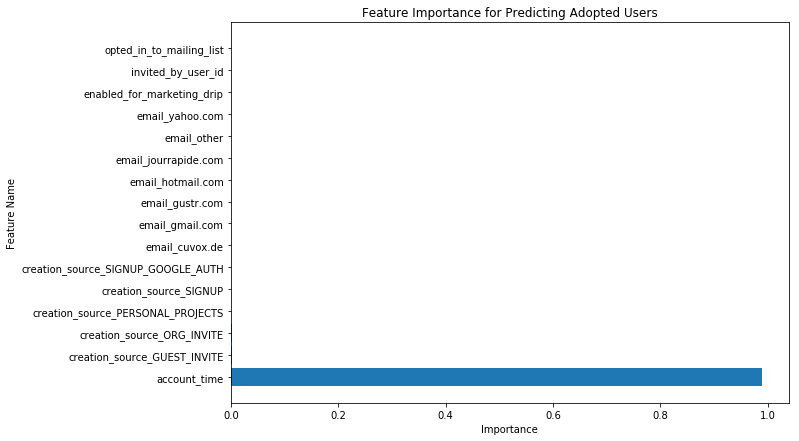

In [66]:
# Bar plot of feature importance 
plt.figure(figsize=(10,7))
plt.barh(sorted(X_train.columns), feature_importance['feature_importance'])
plt.title('Feature Importance for Predicting Adopted Users')
plt.ylabel('Feature Name')
plt.xlabel('Importance')
plt.show()

It appears that the feature that we created, 'account_time', which was the difference between when a user first created their account and when they last loggged in, was by far the most important feature in predicting whether a user became an adopted user. The other features seem almost negligible. 

One possible explanation is that the larger the difference between the last login and the original account creation, the more likely that the user is a repeat customer of the service. If the difference in times is relatively short, then it's more likely that the service wass used once or twice and the user moved on to possibly another service. 

If we wish to go more in depth, further research may include turning 'creation_time' into categorical data (morning, afternoon, and night, for example) to see if the time of day that an account was created would be a factor in predicting adoption.

One other approach that we didn't take was inferential analysis. We could analyze whether the difference in time between account creation and login between adopted users and nonadopted users is statistically significant. If it is, that would further support the idea that adopted users have had their accounts longer than nonadopted users. 
 